# Jane Chinwuko
# Batch number: DS2307

The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

Columns:

•	Fixed Acidity : refers to the quantity of non-volatile acids in wine. .

•	Volatile Acidity: the quantity of acetic acid in wine, which can have an unpleasant, vinegar-like flavour when it is too high..

•	Citric Acid: Citric acid is a natural acid that is found in citrus fruits and can also be found in some wines.

•	Residual Sugar: refers to how much sugar is still present in wine after fermentation..

•	Chlorides: represents the amount of salt that is contained in the wine.

•	free sulfur dioxide: In winemaking, sulphur dioxide is frequently employed as a preservative. The quantity of sulphur dioxide that is unattached to other compounds is referred to as free sulphur dioxide.

•	total sulfur dioxide: represents the entire quantity of sulphur dioxide in the wine, including free and bound.

•	density: relates to the wine's volume/mass ratio.

•	pH: measures the level of acidity or basicity in a wine on a scale from 0 (extremely acidic) to 14 (very basic).

•	sulphates: refers to the quantity of sulfites and other compounds containing sulphur in the wine.

•	Alcohol: represents the wine's alcohol content as a percentage of volume.

•	quality: output variable (score between 3 and 8 depending on sensory data).

In [1]:
# Imported necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE


In [2]:
# loaded the dataset to a Pandas DataFrame
wine_red = pd.read_csv('winequality-red.csv')

## Exploratory Data Analysis

In [3]:
# Viewing the dimensions of the array
wine_red.shape

(1599, 12)

This dataset contains 1599 rows and 12 columns (made up of the independent and target variables)

In [4]:
#Viewing the first 10 rows of the dataset
wine_red.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [5]:
#Viewing the last 10 rows of the dataset
wine_red.tail(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1589,6.6,0.725,0.20,7.8,0.073,29.0,79.0,0.99770,3.29,0.54,9.2,5
1590,6.3,0.550,0.15,1.8,0.077,26.0,35.0,0.99314,3.32,0.82,11.6,6
1591,5.4,0.740,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6,6
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [6]:
#Viewing the columns present in the dataset
columns = wine_red.columns
columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

These are the columns present in the dataset. Quality is the target variable while others are the independant variables.

In [7]:
#Displays the basic information about the columns in the dataset
wine_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


The datatypes for all the independent variables is float64 because they are made up of decimals. The target variable's datatype is interger.

In [8]:
#Displays the unique value for all features
wine_red.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

All variables are numerical with the exception of the target variable (quality) which was considered as a categorical variable.

In [9]:
#Displays the unique value for quality
wine_red['quality'].nunique()

6

There are 6 unique occurences of the values in the target variable. 

In [10]:
#This returns the count of unique occurrences in the quality column before categorizing into binary.
wine_red['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

These are the value counts of the unique occurrences of the quality variable. The quality range is from 3 to 8.

In [11]:
def columns_values(new_df):
    for i in new_df.columns:
        print(new_df[i].value_counts())
        print('\n')
        
columns_values(wine_red)

7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: fixed acidity, Length: 96, dtype: int64


0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.035     1
0.565     1
1.130     1
1.115     1
1.090     1
Name: volatile acidity, Length: 143, dtype: int64


0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.72      1
0.62      1
0.75      1
1.00      1
0.78      1
Name: citric acid, Length: 80, dtype: int64


2.00     156
2.20     131
1.80     129
2.10     128
1.90     117
        ... 
4.25       1
2.85       1
3.45       1
2.35       1
13.90      1
Name: residual sugar, Length: 91, dtype: int64


0.080    66
0.074    55
0.076    51
0.078    51
0.084    49
         ..
0.108     1
0.148     1
0.143     1
0.222     1
0.230     1
Name: chlorides, Length: 153, dtype: int64


6.0     138
5.0     104
10.0     79
15.0     78
12.0     75
7.0      71
9.0      62
16.0     61
17.0

Looking at the value counts for each of the columns, we can see that there are no blank values present in the columns.

In [12]:
#Generating the descriptive statistics of all the features in the dataset
wine_red.describe(include='all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


From the above, we can see that the counts are same, so no null values present in our dataset. The difference between the maximum and the 75% percentile value of the total sulfur dioxide is quite large. We need to check for outliers.

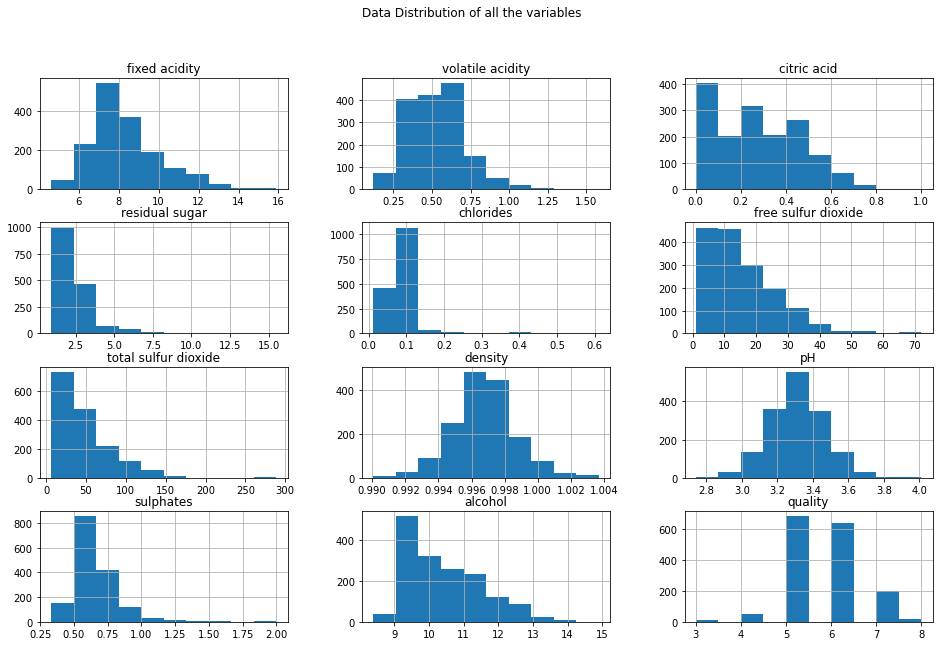

In [13]:
# Histogram containing all the columns
wine_red.hist(bins=10, figsize=(16,10))
plt.suptitle("Data Distribution of all the variables")
plt.show()

From the histogram distribution above, we can see that density and pH are normally distributed. Fixed acidity, sulphate and volatile acidity looks normally distributed but a bit skewed to the right. Features like residual sugar, citric acid, total sulfur dioxide, free sulfur dioxide, chlorides, alchohol are skewed to the right. Skewness provides information on the direction of outliers. We need to check for outliers.

<AxesSubplot:>

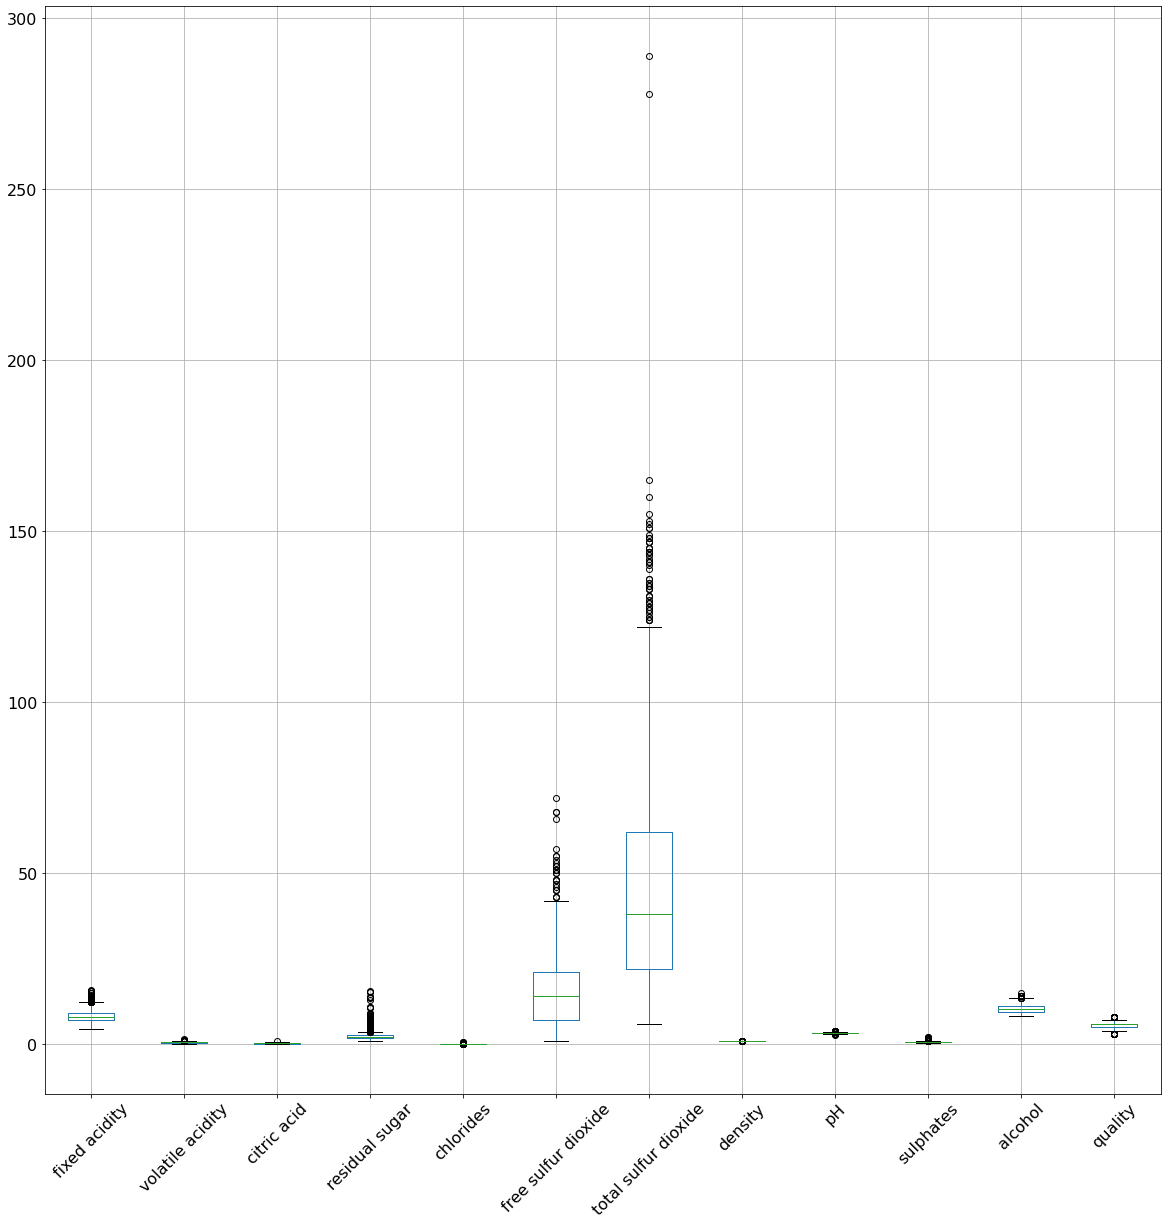

In [14]:
# Boxplot containing all the columns
wine_red.boxplot(column=wine_red.columns.tolist(), figsize=(20,20), grid=True, rot=45, fontsize=16)

From the boxplot above, we can see that most of variables contain some outliers; we need to treat them before building our models.

### Checking and removing of outliers

In [15]:
# selected columns to check for outliers
columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

# create an empty list to store values
column_names = []
total_outliers = []
percentage = []
least_outlier = []

outlierFilter=None

# loop through all column list
for column in columns:
    # finding the 1st quartile
    q1 = wine_red[column].quantile(0.25)

    # finding the 3rd quartile
    q3 = wine_red[column].quantile(0.75)

    # get the column minimum and median values
    min_value = wine_red[column].min()
    median_value = wine_red[column].median()

    # finding the iqr region
    iqr = q3-q1

    # finding upper and lower whiskers
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)

    # Get the array data for wine_red
    arr1 = wine_red[column]

    # Get the outliers in the columns using the upper and lower whiskers
    outliers = arr1[(arr1 <= lower_bound) | (arr1 >= upper_bound)]
    
    # get the min value of the outliers found
    min_value = round(min(outliers.values)) if len(outliers.values) > 0 else 0
    
    # calculate the percentage of the outliers found
    percentage_value = round((len(outliers.values) / len(arr1)) * 100, 2) if len(outliers.values) > 0 else 0
    
    # add values to the list
    column_names.append(column)
    total_outliers.append(len(outliers.values))
    least_outlier.append(min_value)
    percentage.append(percentage_value)
    
    # do this if outliers is less than or equal to 5%
    if round(percentage_value) <= 5 and len(outliers.values) > 0:
        # capping Outliers using IQR Ranges
        wine_red.loc[(wine_red[column] <= lower_bound), column] = lower_bound
        wine_red.loc[(wine_red[column] >= upper_bound), column] = upper_bound
        
    # do this if outliers is greater than 5%
    elif round(percentage_value) > 5 and len(outliers.values) > 0:
        # replacing outlier values with the median value
        wine_red.loc[(wine_red[column] <= lower_bound), column] = median_value
        wine_red.loc[(wine_red[column] >= upper_bound), column] = median_value


print('Outliers Table Summary')

# create a new dictionary
new_dict = {'Column Name': column_names, 'Number of Outliers': total_outliers, 'Least Value': least_outlier, 'Percentage Value': percentage}
# create a new dataframe table
new_df = pd.DataFrame(new_dict)
# display the new dataframe table
new_df

Outliers Table Summary


,Column Name,Number of Outliers,Least Value,Percentage Value
0,fixed acidity,49,12,3.06
1,volatile acidity,19,1,1.19
2,citric acid,1,1,0.06
3,residual sugar,155,4,9.69
4,chlorides,112,0,7.00
5,free sulfur dioxide,33,42,2.06
6,total sulfur dioxide,58,122,3.63
7,density,45,1,2.81
8,pH,35,3,2.19
9,sulphates,59,1,3.69


From the above, we checked and displayed the number of outliers present in our dataset. If these outliers are removed, it will reduce the dimension of our dataset greatly. 

We treated them by:
1) Replacing outlier values with the median value if the percentage value is greater than 5%. 
2) Capping the Outliers using IQR Ranges if the percentage value is less than 5%.

<AxesSubplot:>

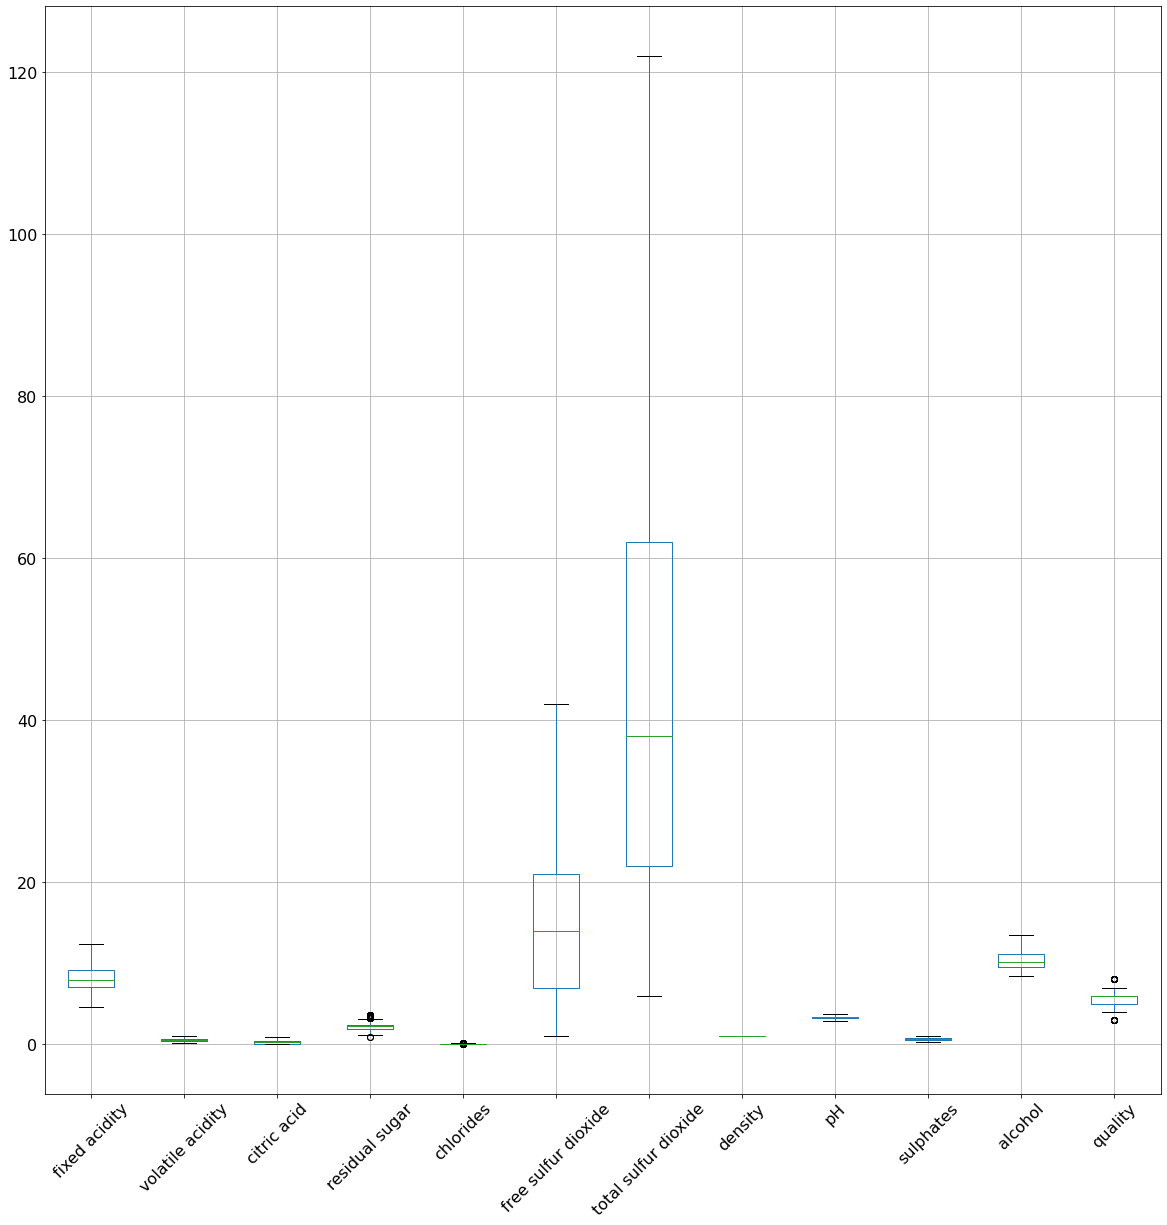

In [16]:
# Plotting the columns using boxplot to check if outliers have been removed
wine_red.boxplot(column=wine_red.columns.tolist(), figsize=(20,20), grid=True, rot=45, fontsize=16)

From the boxplot above, we can see that the outliers have been removed without loss to any data in our dataset,

In [17]:
#Dimension of our dataset after outliers have been removed
wine_red.shape

(1599, 12)

Our dimension still remains same after outliers were removed.

# Data Visualization

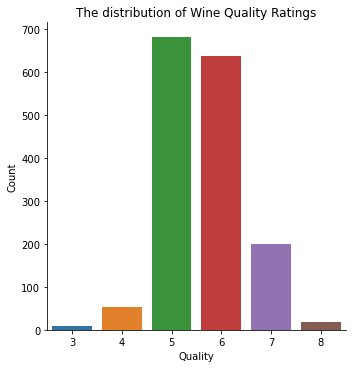

In [18]:
# This catplot shows the distribution of wine quality ratings before categorizing into binary.
sns.catplot(x ='quality', data = wine_red, kind = 'count')
plt.title('The distribution of Wine Quality Ratings')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

Using the catplot to visualiaze the counts, we can see that the 5 and 6 ratings had the highest value

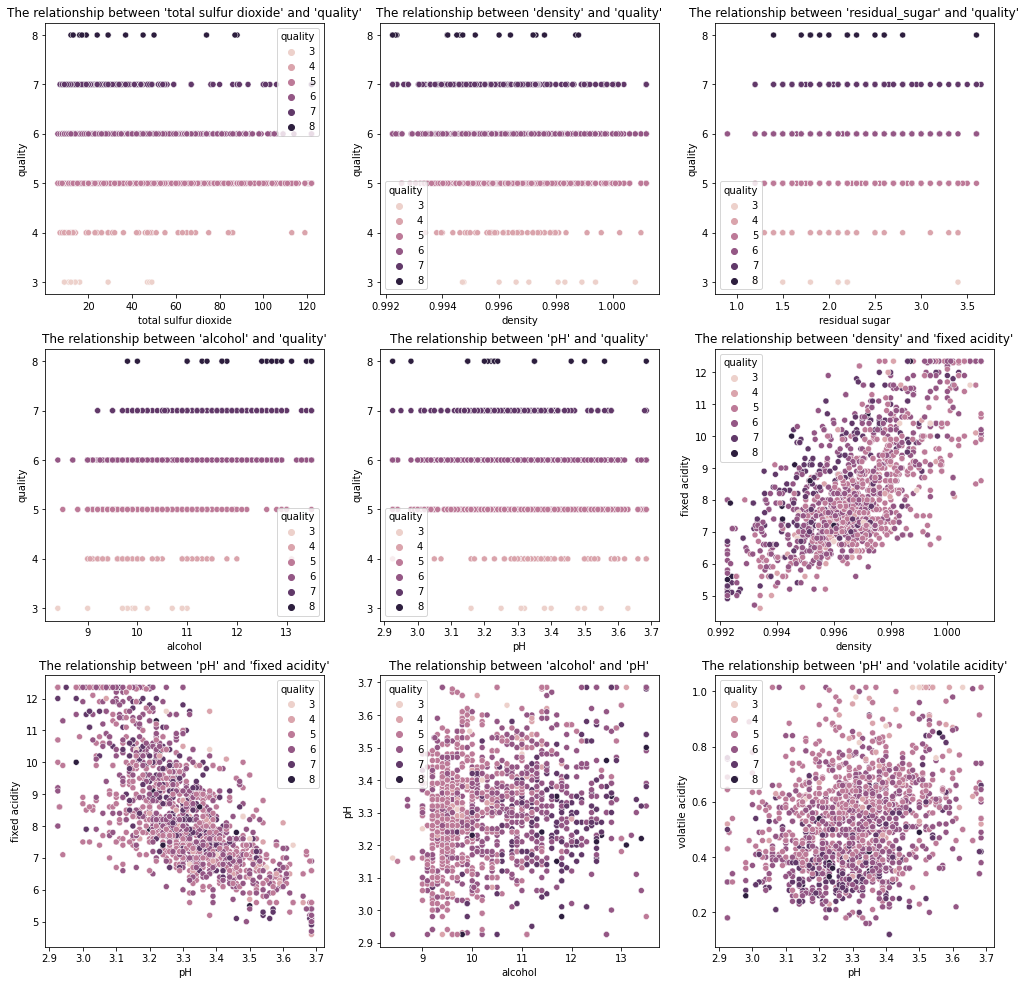

In [19]:
# These scatterplots are is used to visualize the relationships between variables
fig, axes = plt.subplots(3, 3, figsize=(17, 17)) 
axes = axes.flatten()

sns.scatterplot(ax = axes[0],
                x = "total sulfur dioxide",
                y = "quality", hue = "quality",
                data = wine_red).set(title = "The relationship between 'total sulfur dioxide' and 'quality'");

sns.scatterplot(ax = axes[1],
                x = "density",
                y = "quality", hue = "quality",
                data = wine_red).set(title = "The relationship between 'density' and 'quality'");

sns.scatterplot(ax = axes[2],
                x = "residual sugar",
                y = "quality", hue = "quality",
                data = wine_red).set(title = "The relationship between 'residual_sugar' and 'quality'");

sns.scatterplot(ax = axes[3],
                x = "alcohol",
                y = "quality", hue = "quality",
                data = wine_red).set(title = "The relationship between 'alcohol' and 'quality'");

sns.scatterplot(ax = axes[4],
                x = "pH",
                y = "quality", hue = "quality",
                data = wine_red).set(title = "The relationship between 'pH' and 'quality'");

sns.scatterplot(ax = axes[5],
                x = "density",
                y = "fixed acidity", hue = "quality",
                data = wine_red).set(title = "The relationship between 'density' and 'fixed acidity'");

sns.scatterplot(ax = axes[6],
                x = "pH",
                y = "fixed acidity", hue = "quality",
                data = wine_red).set(title = "The relationship between 'pH' and 'fixed acidity'");

sns.scatterplot(ax = axes[7],
                x = "alcohol",
                y = "pH", hue = "quality",
                data = wine_red).set(title = "The relationship between 'alcohol' and 'pH'");

sns.scatterplot(ax = axes[8],
                x = "pH",
                y = "volatile acidity", hue = "quality",
                data = wine_red).set(title = "The relationship between 'pH' and 'volatile acidity'");

From the scatter plots above we can see that there are:

1) no correlation between:
    a) total sulfur dioxide and quality
    b) density and quality
    c) residual and quality
    d) alcohol and quality
    e) pH and quality
    
2) We can see that fixed acidity and density have high positive correlation.

3) There is a very weak positive or no correlation between 
    a) pH and alcohol 
    b) pH and volatile acidity
    
4) There is a negative correlation between fixed acidity and pH
   
   

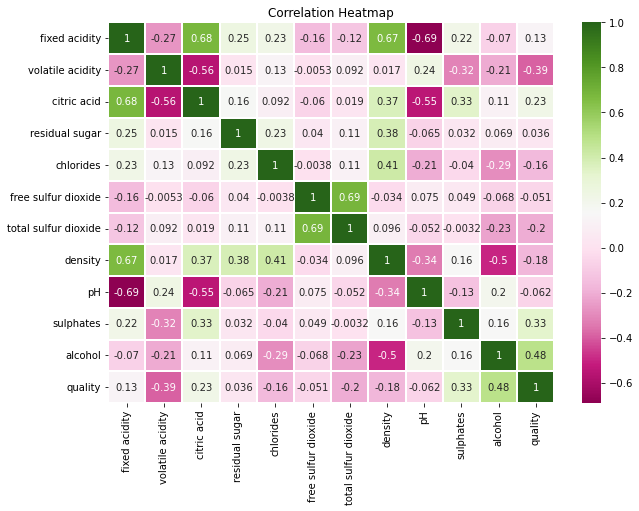

In [20]:
# Using heatmap to visualize the correlation between the numerical features.

plt.figure(figsize=(10,7))
sns.heatmap(wine_red.corr(), annot=True, linewidths = 2, cmap='PiYG')
plt.title('Correlation Heatmap')
plt.show()

From the heatmap, we can see that there is multicollinearity between 

1) fixed acidity and citric acid
2) free sulfur dioxide and total sulfur dioxide 
3) density and fixed acidity

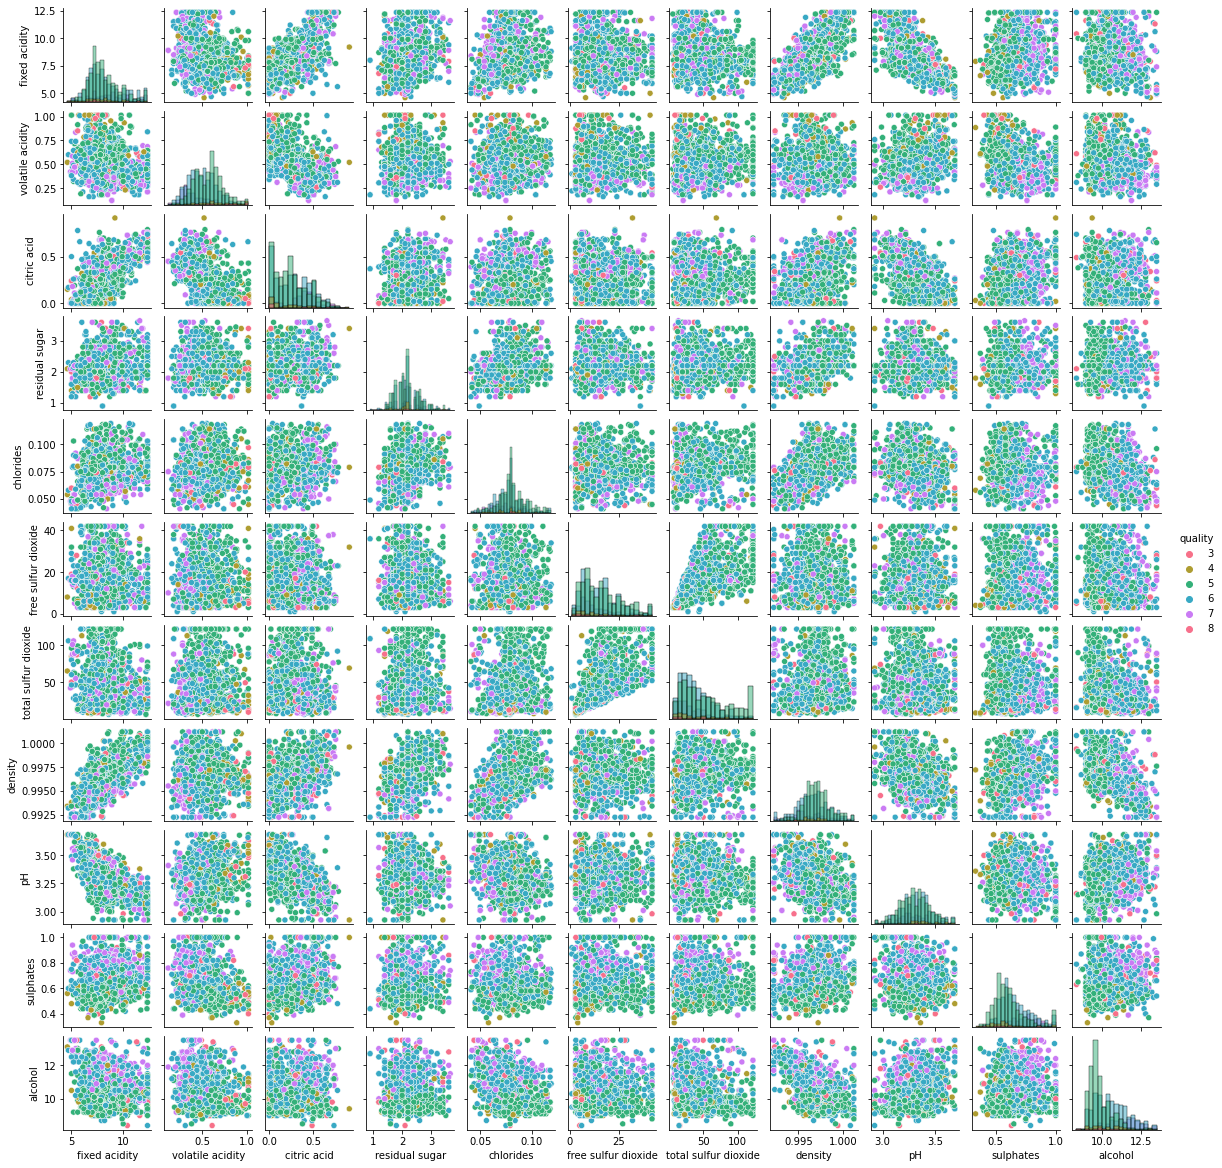

In [21]:
#pairplot showing the distribution of the variables
sns.pairplot(wine_red, diag_kind="hist", hue="quality", height=1.5, palette = 'husl')

From the pairplot above, we can see normal distribution for most of the variables like pH, density. Some variables were skewed to the right before outliers where removed but looking at them now, they are normally distributed.

We can see positive correlation between some variables (e.g density and fixed acidity)

We can see negative correlation between some variables (e.g pH and fixed acidity)

We can see so many no correlations of the variables (e.g total sulfur dioxide and quality)

# Data Preprocessing

In [22]:
# checking for skewness
# created a dataframe to store our variables and the skewness value
skew_data = wine_red.skew().to_frame()
skew_data.index.names = ['columns']
skew_data.columns = ['value']
skew_data

,value
columns,
fixed acidity,0.700363
volatile acidity,0.420928
citric acid,0.309850
residual sugar,0.594367
chlorides,0.195170
free sulfur dioxide,0.858967
total sulfur dioxide,0.972642
density,0.025021
pH,0.054017


From above, we can accept this values because skewness between -1 to 1 is condisered to moderately skewed and we have removed outliers above so we can go ahead and build our model.

In [23]:
#checking for missing values
wine_red.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no null values in the dataset

In [24]:
#Categorizing the quality variable into binary classification
wine_red['quality'] = wine_red['quality'].apply(lambda x: 0 if x< 7 else 1)
wine_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


We have categorised the quality of the wine into two (0 and 1) for easy classification.
Quality rating less that 7 is categorised as Bad wine while ratings greater that 7 is categorised as Good wine.

In [25]:
#This returns the count of unique occurrences in the quality column after categorizing into binary.
wine_red['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

We have more of bad wines than good wines in our dataset.

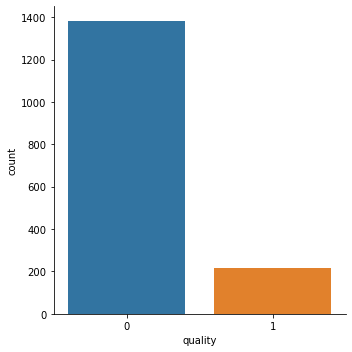

In [26]:
# This catplot shows the distribution of wine quality ratings after categorizing into binary.
sns.catplot(x ='quality', data = wine_red, kind = 'count')


From the plot above, we can see that the counts are imbalance. We shall use the SMOTE method to balance the dataset before training the model.

In [27]:
# Printing the total number of duplicates across all the columns
duplicated = wine_red.duplicated()

print("The number of duplicates in the dataset is:", wine_red.duplicated().sum())

The number of duplicates in the dataset is: 243


In [28]:
#display of some of the duplicates
wine_red[duplicated]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
11,7.5,0.500,0.36,2.2,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,0
27,7.9,0.430,0.21,1.6,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,0
40,7.3,0.450,0.36,2.2,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,0
65,7.2,0.725,0.05,2.2,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.0,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,0
1564,7.2,0.695,0.13,2.0,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,0
1567,7.2,0.695,0.13,2.0,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,0
1581,6.2,0.560,0.09,1.7,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,0


We can see same values in rows 1563 to 1567. We will need to drop the duplicates.

In [29]:
#dimension of the dataset before removing duplicates
wine_red.shape

(1599, 12)

In [30]:
#Removing the duplicates
wine_red.drop_duplicates(inplace=True)

In [31]:
#dimension of the dataset after removing duplicates
wine_red.shape

(1356, 12)

Our dataset number of rows has reduced to 1356 after the duplicates were removed.

In [32]:
# Printing the total number of duplicates across all the columns
duplicated = wine_red.duplicated()

print("The number of duplicates in the dataset is:", wine_red.duplicated().sum())

The number of duplicates in the dataset is: 0


In [33]:
# import the neccessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score, auc
from matplotlib import pyplot
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score



### Feature importance

In [34]:
# selecting our dependent variable (label) and target variable (y)
X = wine_red.drop('quality',axis=1)
y = wine_red['quality']

We dropped the quality variable which is our target variable from the list of features in our dataset. We are going to be predicting the quality of the wine using our independent variables. 

In [35]:
# splitting the features into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

We are splitting our dataset into train and test. We are going to use 70% of our data to train the models and use 30% to validate the performance of our model.  

In [36]:
#viewing the dimension of our train and test variales for our independent and target variables
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((949, 11), (407, 11), (949,), (407,))

We have 949 data in our training. 407 data will be used validation. We have 11 variables

DecisionTreeClassifier(criterion='entropy')
Feature: 0, Score: 0.05098
Feature: 1, Score: 0.11045
Feature: 2, Score: 0.05297
Feature: 3, Score: 0.05439
Feature: 4, Score: 0.04038
Feature: 5, Score: 0.06480
Feature: 6, Score: 0.07312
Feature: 7, Score: 0.07461
Feature: 8, Score: 0.08732
Feature: 9, Score: 0.14038
Feature: 10, Score: 0.25060


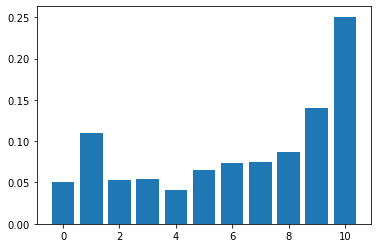

In [37]:
# feature importance using decision tree classifier
decisionTree = DecisionTreeClassifier(criterion='entropy')

print(decisionTree)

dtc_model = decisionTree.fit(X_train, y_train)

importance = dtc_model.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

# Barchat for feature importance
pyplot.bar([x for x in range(len(importance))], importance)

pyplot.show()

 features/columns: [0:'fixed acidity',
 1: 'volatile acidity',
 2: 'citric acid',
 3: 'residual sugar',
 4: 'chlorides',
 5: 'free sulfur dioxide',
 6: 'total sulfur dioxide',
 7: 'density',
 8: 'pH',
 9: 'sulphates',
 10: 'alcohol']

Feature Importances :  [0.0645654  0.11079668 0.08485437 0.05471328 0.06295219 0.07169206
 0.06534535 0.05631931 0.05131476 0.12731634 0.25013027]


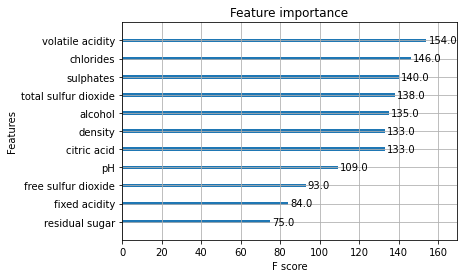

In [38]:
#import the neccessary libraries
from xgboost import XGBClassifier
from xgboost import plot_importance

# feature importance using xgboost classifier
model_xgb = XGBClassifier(random_state = 0 )
model_xgb.fit(X_train, y_train)

print("Feature Importances : ", model_xgb.feature_importances_)

# plot feature importance
plot_importance(model_xgb)
plt.show()

From the decision tree and xgboost classifier methods for feature selections used above, we can see the various features selected by the two classifiers varies. We shall further use the variance inflation factor (VIF) method for feature selection.

In [39]:
#checking the VIF value for multicollinearity between our variables
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X_input):
# Calculating VIF
    vif_df = pd.DataFrame()
    vif_df["Variables"] = X_input.columns
    vif_df["VIF Value"] = [variance_inflation_factor(X_input.values, i) for i in range(X_input.shape[1])]

    return(vif_df)
X = wine_red.iloc[:,:-1]
calc_vif(X)

,Variables,VIF Value
0,fixed acidity,82.212616
1,volatile acidity,16.619476
2,citric acid,8.572806
3,residual sugar,31.445578
4,chlorides,38.516280
5,free sulfur dioxide,7.227727
6,total sulfur dioxide,7.628856
7,density,1543.526800
8,pH,1125.567558
9,sulphates,27.889970


From the result above, we can see that density and pH have a higher VIF value. We shall drop the density variable as it has the highest vif value.

In [40]:
#Dropping density(has highest vif value)
X = wine_red.drop(['density','quality'],axis=1)

calc_vif(X)

,Variables,VIF Value
0,fixed acidity,49.972725
1,volatile acidity,16.589322
2,citric acid,8.568564
3,residual sugar,31.016156
4,chlorides,36.871535
5,free sulfur dioxide,7.179126
6,total sulfur dioxide,7.223315
7,pH,195.025133
8,sulphates,27.663478
9,alcohol,126.303229


We dropped the density column because it had the highest VIF value.

In [41]:
#dropping more columns to reduce our VIF value
X = wine_red.drop(['density','pH','fixed acidity','alcohol','chlorides','residual sugar','sulphates','quality'],axis=1)
calc_vif(X)

,Variables,VIF Value
0,volatile acidity,3.269488
1,citric acid,2.048059
2,free sulfur dioxide,6.199686
3,total sulfur dioxide,6.423086


After dropping density, the VIF value for most of our variables were still high. We had to drop more because a VIF value that is greater than 10 is not tolerable correlation for our model predictions. A value between 5 and 10 indicates a moderate correlation. 

In [42]:
#Standardization of a dataset
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X)
X_test=sc.transform(X)
tabel_col = X.columns
x = pd.DataFrame(X_train, columns = tabel_col)
x

,volatile acidity,citric acid,free sulfur dioxide,total sulfur dioxide
0,0.970587,-1.394451,-0.477846,-0.390236
1,1.986109,-1.394451,0.944788,0.688648
2,1.309094,-1.189331,-0.071379,0.263633
3,-1.398964,1.477233,0.131854,0.459794
4,0.744916,-1.394451,-0.274612,-0.194075
...,...,...,...,...
1351,0.519244,-0.984211,1.249638,-0.259462
1352,0.406408,-0.984211,1.656104,-0.063301
1353,0.124319,-0.881650,2.367421,0.165553
1354,0.660289,-0.779090,1.656104,-0.063301


 We need to scale our variables so that they have a similar scale.

In [43]:
#Using SMOTE algorithm to balance the quality variable
oversam = SMOTE()
X_resam, y_resam = oversam.fit_resample(x, y)
y_resam.value_counts()

0    1174
1    1174
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

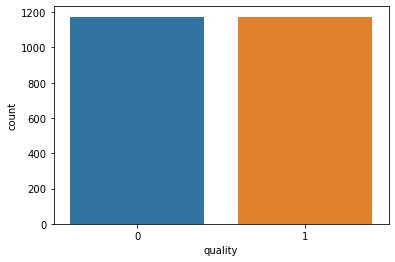

In [44]:
#Display of the quality count after balancing.
sns.countplot(x=y_resam)

After balancing the variable we can see that the value counts are now equal.

# Model Building

In [45]:
# splitting the features into train and test
X_train, X_test, y_train, y_test = train_test_split(X_resam, y_resam, test_size = 0.30, random_state = 42)

We splitted our data in X_train, X_test, y_train and y_test. We shall be using the train variables for the purpose of training our model while the test variables will be used to validate the performance of our model. 70% of our data will be used to train the model while 30% will be used for model validation.

## 1. Decision Tree

In [46]:
# Create a Decision Tree classifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"The Accuracy for Decision Tree: {accuracy:.2f}")
print('\n')
# Display a classification report for more detailed metrics
report = classification_report(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print('\n')
print("Classification Report:")
print(report)



The Accuracy for Decision Tree: 0.84


[[295  71]
 [ 42 297]]


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.81      0.84       366
           1       0.81      0.88      0.84       339

    accuracy                           0.84       705
   macro avg       0.84      0.84      0.84       705
weighted avg       0.84      0.84      0.84       705



### Cross Validation Score for Decision Tree

In [47]:
# Specify the cross-validation strategy
results = []

scores = cross_val_score(dt, X_train, y_train,cv=5)
print("Cross-validation scores:", scores)

# Calculate and print the mean of the scores
mean_score = scores.mean()

print(f"Mean accuracy: {mean_score:.2f}")
print('\n')
print(f'The difference between the accuracy score and the cross validation score is: {accuracy- mean_score}')


diff = accuracy - mean_score
results.append(['Decision Tree',accuracy, mean_score, diff])

Cross-validation scores: [0.84194529 0.82370821 0.80547112 0.80792683 0.8597561 ]
Mean accuracy: 0.83


The difference between the accuracy score and the cross validation score is: 0.01195480267872584


## 2. Random Forest

In [48]:
# Create a Random Forest classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"The Accuracy for Random Forest is: {accuracy:.2f}")
print('\n')
# Display a classification report for more detailed metrics
report = classification_report(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print('\n')
print("Classification Report:")
print(report)

The Accuracy for Random Forest is: 0.87


[[305  61]
 [ 30 309]]


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.83      0.87       366
           1       0.84      0.91      0.87       339

    accuracy                           0.87       705
   macro avg       0.87      0.87      0.87       705
weighted avg       0.87      0.87      0.87       705



#### Cross Validation Score for Random Forest

In [49]:

scores = cross_val_score(rf, X_train, y_train,cv=5)  # You can choose a different scoring metric
print("Cross-validation scores:", scores)

# Calculate and print the mean of the scores
mean_score = scores.mean()

print(f"Mean accuracy: {mean_score:.2f}")
print('\n')
print(f'The difference between the accuracy score and the cross validation score is: {accuracy- mean_score}')


diff = accuracy - mean_score
results.append(['Random Forest',accuracy, mean_score, diff])

Cross-validation scores: [0.88449848 0.86018237 0.87537994 0.86280488 0.9054878 ]
Mean accuracy: 0.88


The difference between the accuracy score and the cross validation score is: -0.006748708824474314


## 3. Logistic Regression

In [50]:
# Create a Logistic Regression classifier
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, lr_pred)
print(f"The Accuracy for Logistic Regression is: {accuracy:.2f}")
print('\n')
# Display a classification report for more detailed metrics
report = classification_report(y_test, lr_pred)
print(confusion_matrix(y_test, lr_pred))
print('\n')
print("Classification Report:")
print(report)

The Accuracy for Logistic Regression is: 0.72


[[242 124]
 [ 76 263]]


Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.66      0.71       366
           1       0.68      0.78      0.72       339

    accuracy                           0.72       705
   macro avg       0.72      0.72      0.72       705
weighted avg       0.72      0.72      0.72       705



#### Cross Validation Score for Logistic Regression

In [51]:

scores = cross_val_score(lr, X_train, y_train,cv=5)  # You can choose a different scoring metric
print("Cross-validation scores:", scores)

# Calculate and print the mean of the scores
mean_score = scores.mean()

print(f"Mean accuracy: {mean_score:.2f}")

print('\n')
print(f'The difference between the accuracy score and the cross validation score is: {accuracy- mean_score}')


diff = accuracy - mean_score
results.append(['Logistic Regression',accuracy, mean_score, diff])

Cross-validation scores: [0.72948328 0.70212766 0.7112462  0.68292683 0.75      ]
Mean accuracy: 0.72


The difference between the accuracy score and the cross validation score is: 0.001155262312501515


## 4. Support Vector Machines (SVM)

In [52]:
from sklearn import svm

svm = svm.SVC(decision_function_shape = 'ovo')
svm.fit(X_train, y_train)
prediction_svm = svm.predict(X_test)
accuracy = accuracy_score(y_test, prediction_svm)
# Display a classification report for more detailed metrics
print(f"The Accuracy for SVM is: ", accuracy)
print('\n')

print(confusion_matrix(y_test, prediction_svm))
print(classification_report(y_test, prediction_svm))

The Accuracy for SVM is:  0.7858156028368795


[[270  96]
 [ 55 284]]
              precision    recall  f1-score   support

           0       0.83      0.74      0.78       366
           1       0.75      0.84      0.79       339

    accuracy                           0.79       705
   macro avg       0.79      0.79      0.79       705
weighted avg       0.79      0.79      0.79       705



#### Cross Validation Score for Support Vector Machines

In [53]:

scores = cross_val_score(svm, X_train, y_train,cv=5) 
print("Cross-validation scores:", scores)

# Calculate and print the mean of the scores
mean_score = scores.mean()

print(f"Mean accuracy: {mean_score:.2f}")

print('\n')
print(f'The difference between the accuracy score and the cross validation score is: {accuracy- mean_score}')


diff = accuracy - mean_score
results.append(['Support Vector Machine',accuracy, mean_score, diff])

Cross-validation scores: [0.76291793 0.75987842 0.76291793 0.75       0.81707317]
Mean accuracy: 0.77


The difference between the accuracy score and the cross validation score is: 0.015258111547680864


## 5. Xgboost Classifier

In [54]:
# Create a Xgboost classifier
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"The Accuracy for Xgboost Classifier is: ",accuracy)
print('\n')

# Display a classification report for more detailed metrics
report = classification_report(y_test, y_pred_xgb)
print(confusion_matrix(y_test, y_pred_xgb))
print('\n')
print("Classification Report:")
print(report)

The Accuracy for Xgboost Classifier is:  0.8780141843971632


[[312  54]
 [ 32 307]]


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.85      0.88       366
           1       0.85      0.91      0.88       339

    accuracy                           0.88       705
   macro avg       0.88      0.88      0.88       705
weighted avg       0.88      0.88      0.88       705



#### Cross Validation Score for Xgboost Classifier

In [55]:

scores = cross_val_score(xgb, X_train, y_train, cv=5) 
print("Cross-validation scores:", scores)

# Calculate and print the mean of the scores
mean_score = scores.mean()

print(f"Mean accuracy: {mean_score:.2f}")

print('\n')
print(f'The difference between the accuracy score and the cross validation score is: {accuracy- mean_score}')


diff = accuracy - mean_score
results.append(['Xgboost Classifier', accuracy, mean_score, diff])

Cross-validation scores: [0.91793313 0.8662614  0.88449848 0.875      0.91158537]
Mean accuracy: 0.89


The difference between the accuracy score and the cross validation score is: -0.013041490597276661


In [56]:
# create dataframe for all the accuracy scores and cross validation score for the models used
df = pd.DataFrame(results, columns=['Algorithm', 'Accuracy Score','Cross Validation Score', 'Difference btw accuracy and Cross Validtion Score'])
df

,Algorithm,Accuracy Score,Cross Validation Score,Difference btw accuracy and Cross Validtion Score
0,Decision Tree,0.839716,0.827762,0.011955
1,Random Forest,0.870922,0.877671,-0.006749
2,Logistic Regression,0.716312,0.715157,0.001155
3,Support Vector Machine,0.785816,0.770557,0.015258
4,Xgboost Classifier,0.878014,0.891056,-0.013041


from the tables above, we can see that Random Forest had the highest accuracy followed by Xgboost classifier. We will select our best model based on the model with the least value gotten after subtracting the accuracy score from the cross validation score.

In [57]:
#Selection of the best model based on the difference between the accuracy and cross validation score
least_value = min(df['Difference btw accuracy and Cross Validtion Score'].tolist())
best_model = df.loc[(df['Difference btw accuracy and Cross Validtion Score']) == least_value, 'Algorithm']
best_model = ' '.join(str(best_model).split()[1:-4])
print('From the table above, my best model is the', best_model)

From the table above, my best model is the Xgboost Classifier


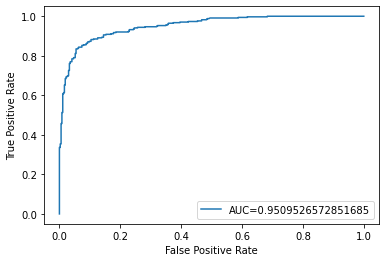

In [58]:
#ROC plot of the best model
import sklearn.metrics as metrics
#define metrics
y_pred_proba = xgb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

From the ROC curve above, we can see that the AUC value for our best model is 95%

In [59]:
from sklearn.model_selection import GridSearchCV

model_best = XGBClassifier()

model_param = {
    
    'n_estimators': [100,500,550],
    'max_depth': [None],
    'learning_rate':[0.1,0.5],
    'gamma':[0,0.5,1,2,3],
    'sampling_method': ['uniform']
    }

In [60]:
gd_search = GridSearchCV(model_best, model_param, cv = 5)

gd_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=N

In [61]:
#display the best parameters from the search

print("The best n_estimators is : " + str(gd_search.best_params_["n_estimators"]),
     "\nThe best max_depth: " + str(gd_search.best_params_["max_depth"]),
     "\nThe best learning_rate: " + str(gd_search.best_params_["learning_rate"]),
      "\nThe best gamma: " + str(gd_search.best_params_["gamma"]),
     "\nThe best sampling_method: " + str(gd_search.best_params_["sampling_method"]))

The best n_estimators is : 500 
The best max_depth: None 
The best learning_rate: 0.5 
The best gamma: 0 
The best sampling_method: uniform


In [66]:
# train the model with the selected parameters
wine_model = XGBClassifier(n_estimators  = 500, max_depth = None, learning_rate = 0.5, gamma = 0, sampling_method = 'uniform')
wine_model.fit(X_train, y_train)
y_pred = wine_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8794326241134752

There was an improvement in the accuracy score. We had accuracy of 0.878014 after training our model without parameters and 0.8794326 after using the parameters.

In [67]:
import pickle
# save the model to disk
filename = 'wine_red.sav'
pickle.dump(wine_model, open(filename, 'wb'))

In [68]:
#prediction using our saved model
load_model = pickle.load(open(filename, 'rb'))
accuracy_dataframe = pd.DataFrame({"y_test": y_test, "y_pred": y_pred})
accuracy_dataframe

,y_test,y_pred
1393,1,1
668,0,0
2000,1,1
808,1,0
1901,1,1
...,...,...
1359,1,1
674,0,0
1025,1,0
447,1,1


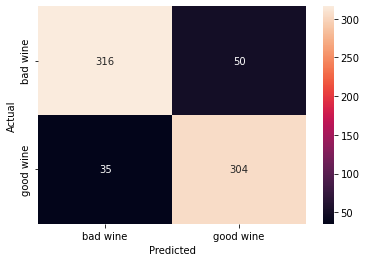

In [69]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
label=['bad wine', 'good wine']
sns.heatmap(matrix, annot=True, fmt='d', xticklabels=label, yticklabels=label,)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Conclusions

After using different algorithms, we conclude that Xgboost classifier was the best model. There was a slight increase in the accuracy score after using the parameters suggested by the grid search algorithm. We used the model to make predictions and from the results obtained, we can see that from the 10 predictions made, the model was able to predict 8 correctly. From the confusion matrix displayed, we can see that the model predicted 316 bad wine and its bad wine, 304 good wine and its good wine. 
